# Exploring least squares  

Lets generate some non-linear data

In [1]:
y(x)=x^3-0.5*x^2+5

y (generic function with 1 method)

In [3]:
using Plots
pyplot()

Plots.PyPlotBackend()

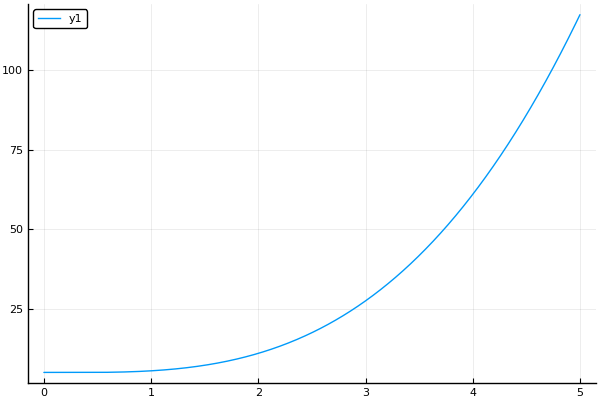

In [4]:
plot(0:0.01:5,y)

In [5]:
import Random: seed!
seed!(44);

In [6]:
x=rand(20)*3 |> sort

20-element Array{Float64,1}:
 0.3074558417630391 
 0.41666360652465406
 0.4688884330662302 
 0.4733555141090249 
 0.8021905377576986 
 1.1247662720540539 
 1.5816113856412388 
 1.6919365054134237 
 1.7740884998640236 
 1.832933642164189  
 1.866578966594868  
 1.9063078735383918 
 2.131271718903294  
 2.140784117655723  
 2.274959451155755  
 2.6340729674321315 
 2.6708356872257237 
 2.7836880183344084 
 2.8759893494218254 
 2.97652247953822   

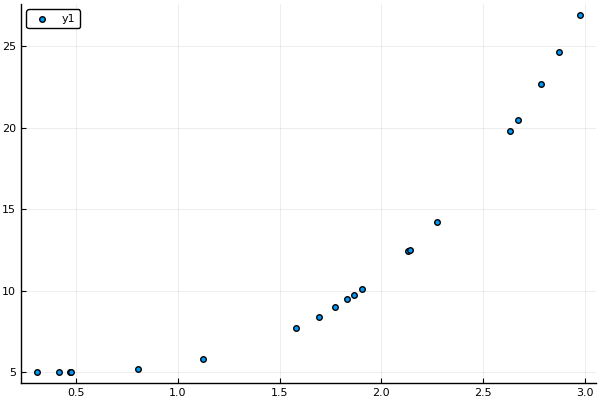

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [7]:
y_t=y.(x)
scatter(x,y_t)

First order least squares model

In [8]:
X=hcat(x,ones(length(x)))

20×2 Array{Float64,2}:
 0.307456  1.0
 0.416664  1.0
 0.468888  1.0
 0.473356  1.0
 0.802191  1.0
 1.12477   1.0
 1.58161   1.0
 1.69194   1.0
 1.77409   1.0
 1.83293   1.0
 1.86658   1.0
 1.90631   1.0
 2.13127   1.0
 2.14078   1.0
 2.27496   1.0
 2.63407   1.0
 2.67084   1.0
 2.78369   1.0
 2.87599   1.0
 2.97652   1.0

In [9]:
y_t=y.(x)

20-element Array{Float64,1}:
  4.981798975044752
  4.985532088649638
  4.993159924057186
  4.994029891472327
  5.194462529865589
  5.790391290189321
  7.705645013645297
  8.412096010190348
  9.010053410403124
  9.478184828037342
  9.761321062015865
 10.11053646588011 
 12.40975675098399 
 12.519642464203056
 14.186197037184224
 19.80692468169491 
 20.4853595524636  
 22.696113437476974
 24.65255572317473 
 26.941211716969427

In [10]:
w=(X'*X)\X'*y_t

2-element Array{Float64,1}:
  7.406365199451452 
 -0.9072194071359538

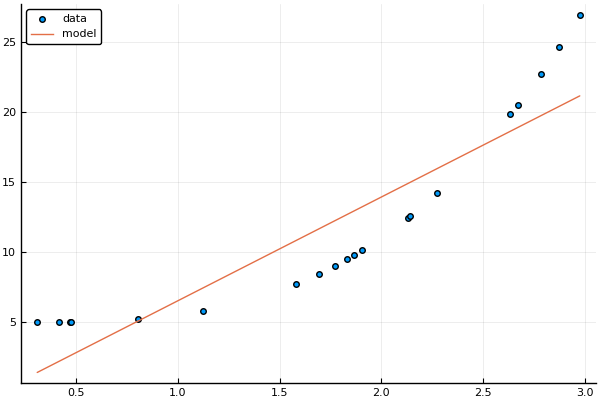

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [11]:
scatter(x,y, label="data")
plot!(x,X*w, label="model")

2nd order model

In [12]:
X=hcat(x.^2, x,ones(length(x)));
w=(X'*X)\X'*y_t

3-element Array{Float64,1}:
  4.536510524484177
 -7.114246255438022
  7.330696744700777

In [13]:
f2(x)=x^2*w[1]+x*w[2]+w[3]

f2 (generic function with 1 method)

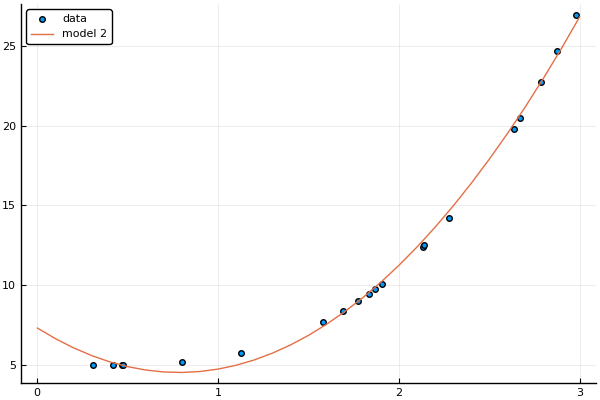

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [14]:
scatter(x,y, label="data")

plot!(0:0.1:3,f2, label="model 2")

In [15]:
xgen(x,n)=hcat([x.^(n-i) for i=0:n-1]...,ones(length(x)))

xgen (generic function with 1 method)

In [16]:
using LinearAlgebra # to get dot
find_w(X,y_t)=(X'*X)\X'*y_t
function f_p(x,w)
    n=length(w)-1
    X=xgen(x,n)
    dot(X,w)
end

f_p (generic function with 1 method)

In [17]:
X=xgen(x,3)
w=find_w(X,y_t)

4-element Array{Float64,1}:
  0.9999999999995133   
 -0.49999999999753086  
 -3.510081114654895e-12
  5.000000000001153    

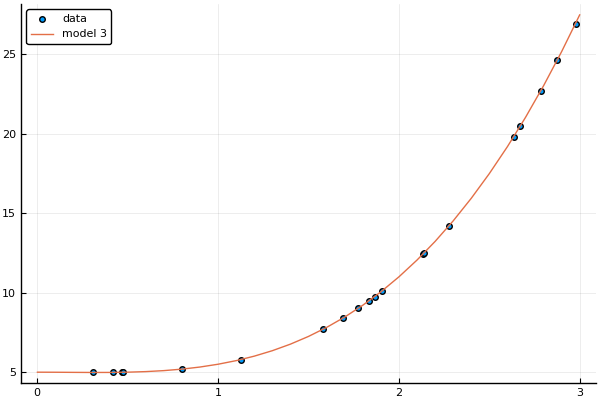

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [18]:
scatter(x,y, label="data")

plot!(0:0.1:3,x->f_p(x,w), label="model 3")

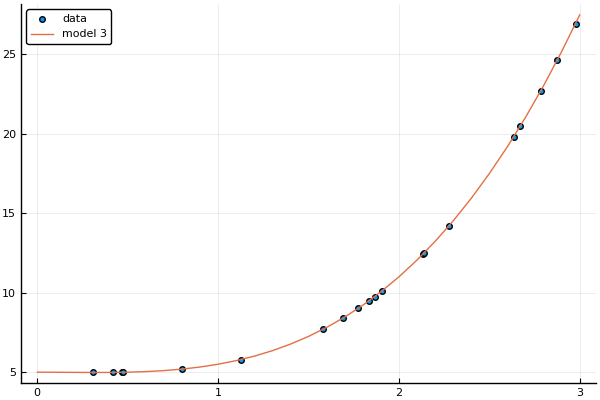

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [19]:
X=xgen(x,10)
w=find_w(X,y_t)
scatter(x,y, label="data")

plot!(0:0.1:3,x->f_p(x,w), label="model 3")

In [20]:
y_t=y.(x) +rand(length(x));

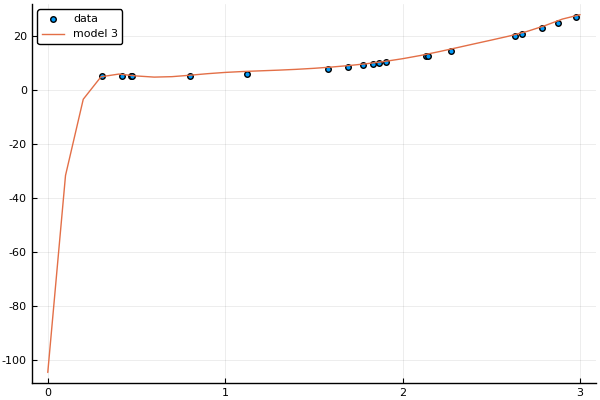

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [21]:
X=xgen(x,10)
w=find_w(X,y_t)
scatter(x,y, label="data")

plot!(0:0.1:3,x->f_p(x,w), label="model 3")

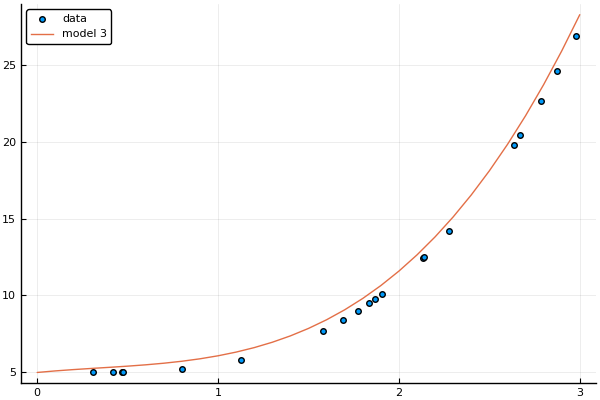

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [22]:
X=xgen(x,3)
w=find_w(X,y_t)
scatter(x,y, label="data")

plot!(0:0.1:3,x->f_p(x,w), label="model 3")